# Tesseract Evaluation - Stringvergleich psm 11

In diesem Notebook wird untersucht, wie gut die Textextraktion mit Tesseract auf dem Bilddatensatz funktioniert, indem ground truth und OCR-Text jeweils als Strings verglichen werden.

Hier und den weiteren notebooks wird mit der tesseract version 5.5.0 gearbeitet

Es wird psm 11 verwendet


---
#### 1. Textextraktion mit tesseract
---
#### 2. Evaluation 
    2.1 Berechnung Character Accuracy 
    2.2 Berechnung Word Accuracy
    2.3 Berechnung CER und WER
---

#### TEST: Textextraktion aus einem Bild

In [78]:
import pytesseract
from PIL import Image


img = Image.open("../../data/images/insta_images/0001.jpg")

text = pytesseract.image_to_string(img, lang='deu')  # 'deu' für Deutsch

print(text)


ÄCHCAFE—&
aHTSFELER

DIENSTAG 21.12.
OLOF-PALME ZENTRUM —
19 UHR

WIR FREUEN UNS AUF EUCH!



#### Laden des Dataframes mit Ground Truth 

In [79]:
import pandas as pd

df = pd.read_csv("../../data/image_data_with_groundtruth.csv")
df.head(2)


,original name,file_name,category,URL,Plattform,channel name,ground_truth,OCR_ChatGPT4
0,Weihnachtsfeier im Sprachcafé! Wir laden euch ...,0001.jpg,noisy,https://www.instagram.com/p/CXTzhTAs4O2/?img_i...,Instagram,sprachcafe.berlin,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,Sprachcafe Weihnachtsfeier Dienstag 21.12. Olo...
1,Dresden 8.8. 16 Uhr #demokratischerwiderstand ...,0002.jpg,noisy,https://www.instagram.com/p/CDbyO8SnQ9Z/,Instagram,nichtohneuns,SCHLIESST EUCH AN! ET Video & Content nichtohn...,SCHLIESST EUCH AN! KUNDGEBUNG #SOLIDARITÄT MIT...


---
### 1. Textextraktion 
#### Anwenden von Tesseract auf gesamtem Datensatz
Monitoring von Ressourcen-Verbrauch für späteren Vergleich mit EasyOCR  
Der extrahierte Text wird als String ausgegeben

In [80]:
import pytesseract
from PIL import Image
import os

import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath(".."))
from ressourcen_monitor import monitor

IMAGE_PATH_BASE = os.path.join("../../data/images/insta_images")


def extract_text_from_image(image_path):
    try:
        img = Image.open(image_path)
        text = pytesseract.image_to_string(img, lang='deu', config="--psm 11")
        return text.strip() # Remove spaces at the beginning and at the end of the string
    except Exception as e:
        return f"Fehler: {e}"


def get_ocr_text(name):
    image_path = os.path.join(IMAGE_PATH_BASE, name)
    return extract_text_from_image(image_path)


# OCR auf alle Bilder im DataFrame anwenden - 
# so :  - df["ocr_tesseract"] = df["name"].apply(get_ocr_text) - nicht möglich, wenn man wrapper funktion nutzen will
# kann nur auf/für funktion angewendet werden


@monitor(full_name="Tesseract OCR psm11") # kann nur bei Funktionen angewendet werden
def apply_ocr():
    df["ocr_tesseract"] = df["file_name"].apply(get_ocr_text)  #The apply() method allows you to apply a function along one of the axis of the DataFrame


In [81]:
apply_ocr()

[codecarbon WARNING @ 09:09:32] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 09:09:32] Error while trying to count physical CPUs: [Errno 2] No such file or directory: 'lscpu'. Defaulting to 1.
[codecarbon INFO @ 09:09:32] [setup] RAM Tracking...
[codecarbon INFO @ 09:09:32] [setup] CPU Tracking...
[codecarbon WARNING @ 09:09:32] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 09:09:32] CPU Model on constant consumption mode: Apple M1 Max
[codecarbon WARNING @ 09:09:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:09:32] [setup] GPU Tracking...
[codecarbon INFO @ 09:09:32] No GPU found.
[codecarbon INFO @ 09:09:32] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global const


--- Ressourcenbericht für 'Tesseract OCR psm11' ---
CPU-Zeit:     2.12 s
RAM genutzt:  110.33 MB
Laufzeit:     124.39 s
CO₂-Ausstoß:  0.000001 kg
-------------------------------------------



In [35]:
df[["file_name", "category", "ground_truth", "ocr_tesseract" ]].head(5)


,file_name,category,ground_truth,ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,D D\n\n3\n\n@\n\nSTA\n\nN\n\n„\n\nXM\n\nS\n\n3...
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,FEIERABEND\n\nSINGEN\n\nf\n\n\\n\nX\n\nM JEDES...
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,x .I.I.V '( ].E—‘j\n\naa“\n\nll\n\n|‘l?-;l\n\n...


### Erstellen einer CSV mit dem OCR-Output von Tesseract für weitere Analysen

In [36]:
df.to_csv("../../data/OCR/tesseract/OCR_tesseract_simple_psm11.csv", index=False)


In [37]:
df = pd.read_csv("../../data/OCR/tesseract/OCR_tesseract_simple_psm11.csv")
df.head(1)

,original name,file_name,category,URL,Plattform,channel name,ground_truth,OCR_ChatGPT4,ocr_tesseract
0,Weihnachtsfeier im Sprachcafé! Wir laden euch ...,0001.jpg,noisy,https://www.instagram.com/p/CXTzhTAs4O2/?img_i...,Instagram,sprachcafe.berlin,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,Sprachcafe Weihnachtsfeier Dienstag 21.12. Olo...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...


In [38]:
df.drop( ["original name", "URL", "Plattform", "channel name", "OCR_ChatGPT4"], axis=1, inplace=True)

In [39]:
df.head(1)

,file_name,category,ground_truth,ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...


In [40]:
df.shape

(200, 4)

#### Untersuchung auf NAN Werte 

In [41]:
df['ocr_tesseract'].isna().sum()


0

In [42]:
df.to_csv("../../data/OCR/tesseract/OCR_tesseract_simple_psm11.csv", index=False)

---

### 2. Evaluation

Es wird kein einfacher Stringvergleich durchgeführt. Diese Verfahren liefert keine Ergebnisse

#### OCR Output bereinigen  
die Strings werden von doppelten Leerzeichen und Umbrüchen bereinigt, damit sie in der Struktur dem ground truth gleichen


In [43]:
# NAN Werte im df werden in leeren String umgewandelt
def normalize_text(ocr_tesseract):
    return ' '.join(str(ocr_tesseract).split()) if pd.notna(ocr_tesseract) else ''

In [44]:
def apply_normalize_text(row):
    return normalize_text(row.ocr_tesseract)

df["normalized_ocr_tesseract"] = df.apply(apply_normalize_text, axis=1)

In [45]:
df.head(1)

,file_name,category,ground_truth,ocr_tesseract,normalized_ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...,*SP CHCAFE& WEIR aHTSFELER \\—h[ \ l U ou1r-mg...


In [46]:
df.to_csv("../../data/OCR/tesseract/OCR_tesseract_simple_psm11.csv", index=False)

### 2.1 Character Accuracy 

dabei wird die Levenshtein Distance, quasi die absoluten Fehler, mit der Länge des Strings im ground truth ins Verhältnis gesetzt, um eine bessere Einschätzung zur Accuracy zu treffen

In [47]:
# Ersetzen der NAN Werte durch leeren String, da sonst keine Berechnung möglich ( Fehlermeldung, weil anderer Datentyp

df["ocr_tesseract"] = df["ocr_tesseract"].fillna("")


In [48]:
df['ocr_tesseract'].isna().sum()

0

In [49]:
import Levenshtein

def character_accuracy(ocr_text, ground_truth):
    distance = Levenshtein.distance(ocr_text, ground_truth)
    max_len = len(ground_truth) 
    return 1 - (distance / max_len)

df["char_accuracy02"] = df.apply(
    lambda row: character_accuracy(row["normalized_ocr_tesseract"], row["ground_truth"]),
    axis=1
)

df["char_accuracy"] = df.apply(
    lambda row: character_accuracy(row["ocr_tesseract"], row["ground_truth"]),
    axis=1
)



In [50]:
df.head()

,file_name,category,ground_truth,ocr_tesseract,normalized_ocr_tesseract,char_accuracy02,char_accuracy
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...,*SP CHCAFE& WEIR aHTSFELER \\—h[ \ l U ou1r-mg...,0.591398,0.516129
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,D D\n\n3\n\n@\n\nSTA\n\nN\n\n„\n\nXM\n\nS\n\n3...,D D 3 @ STA N „ XM S 3 Z '} ‘\ A 2a LLL n A Au...,0.494318,0.261364
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,Gedenkkundgebung und antifaschistische Demonst...,0.643963,0.563467
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,FEIERABEND\n\nSINGEN\n\nf\n\n\\n\nX\n\nM JEDES...,FEIERABEND SINGEN f \ X M JEDESR 1ST >O-\L4IC&...,0.259494,0.221519
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,x .I.I.V '( ].E—‘j\n\naa“\n\nll\n\n|‘l?-;l\n\n...,"x .I.I.V '( ].E—‘j aa“ ll |‘l?-;l ÜT T, 9)] u ...",0.352941,0.227941


In [51]:
# Prüfung auf unterschiedliche Werte
unterschiede = (df["char_accuracy"] != df["char_accuracy02"]).sum()
print(f"Anzahl unterschiedlicher Werte bei char accuracy: {unterschiede}")

Anzahl unterschiedlicher Werte bei char accuracy: 200


In [52]:
char_accuracy_mean = df["char_accuracy"].mean()
print(f"char_accuracy_mean: {char_accuracy_mean * 100:.2f}%")


char_accuracy_mean: 29.35%


In [53]:
char_accuracy_mean = df["char_accuracy02"].mean()
print(f"char_accuracy_mean: {char_accuracy_mean * 100:.2f}%")


char_accuracy_mean: 43.52%


##### ---> die durchschnittliche Character Accuracy (auf dem zuvor normalisierten OCR-Text) liegt bei 43,52%

In [54]:
avg_accuracy_per_category = df.groupby("category")["char_accuracy02"].mean() *100
print((avg_accuracy_per_category).sort_values(ascending=False))


category
simple    56.626583
fancy     42.300864
skewed    34.719939
photo     33.568263
noisy     33.053014
Name: char_accuracy02, dtype: float64


psm 3:  
simple    62.467354  
photo     42.567337  
fancy     40.257255  
noisy     38.666646  
skewed    33.406731  

#### 2.3 Word Accuracy 

In [55]:
def word_accuracy(ocr_text, ground_truth):
    ocr_words = ocr_text.split()
    gt_words = ground_truth.split()
    matches = sum(1 for p, t in zip(ocr_words, gt_words) if p == t) # zip paart Wörter nach ihrer Position
    max_len = len(gt_words)
    return matches / max_len


In [56]:
df["word_accuracy"] = df.apply(
    lambda row: word_accuracy(row["ocr_tesseract"], row["ground_truth"]),
    axis=1
)

df["word_accuracy02"] = df.apply(
    lambda row: word_accuracy(row["normalized_ocr_tesseract"], row["ground_truth"]),
    axis=1
)


In [57]:
df.head(2)

,file_name,category,ground_truth,ocr_tesseract,normalized_ocr_tesseract,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...,*SP CHCAFE& WEIR aHTSFELER \\—h[ \ l U ou1r-mg...,0.591398,0.516129,0.0,0.0
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,D D\n\n3\n\n@\n\nSTA\n\nN\n\n„\n\nXM\n\nS\n\n3...,D D 3 @ STA N „ XM S 3 Z '} ‘\ A 2a LLL n A Au...,0.494318,0.261364,0.0,0.0


In [58]:
word_accuracy_mean = df["word_accuracy"].mean()
print(f"word_accuracy_mean: {word_accuracy_mean * 100:.2f}%")

word_accuracy_mean: 10.46%


In [59]:
word_accuracy_mean02 = df["word_accuracy02"].mean()
print(f"word_accuracy_mean: {word_accuracy_mean * 100:.2f}%")

word_accuracy_mean: 10.46%


##### ---> die durchschnittliche Word Accuracy liegt bei 10.46% (kein Unterschied zw. normalized OCR-Text und not normalized OCR-Text)

In [60]:
avg_word_accuracy_per_category = df.groupby("category")["word_accuracy02"].mean() *100
print((avg_word_accuracy_per_category).sort_values(ascending=False))

category
simple    20.323707
skewed     9.041026
noisy      6.243257
fancy      4.363754
photo      3.343787
Name: word_accuracy02, dtype: float64


In [61]:
avg_word_accuracy_per_category = df.groupby("category")["word_accuracy"].mean() *100
print((avg_word_accuracy_per_category).sort_values(ascending=False))

category
simple    20.323707
skewed     9.041026
noisy      6.243257
fancy      4.363754
photo      3.343787
Name: word_accuracy, dtype: float64


In [62]:
df.to_csv("../../data/OCR/tesseract/tesseract_results_string_psm11.csv", index=False)

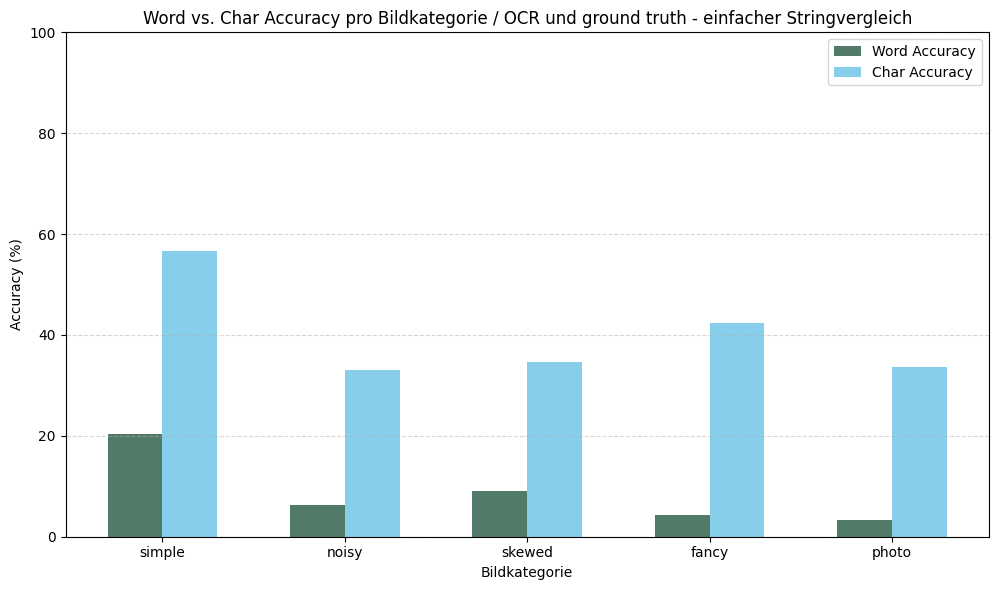

In [64]:
import matplotlib.pyplot as plt
import pandas as pd


categories = ['simple', 'noisy', 'skewed', 'fancy', 'photo']

word_accuracy = [20.323707, 6.243257, 9.041026, 4.363754, 3.343787]
char_accuracy = [56.626583, 33.053014, 34.719939, 42.300864, 33.568263]





# DataFrame erstellen
df = pd.DataFrame({
    'category': categories,
    'word_accuracy': word_accuracy,
    'char_accuracy': char_accuracy
})

# Balkendiagramm
x = range(len(categories))
bar_width = 0.30

plt.figure(figsize=(10, 6))
plt.bar(x, df['word_accuracy'], width=bar_width, label='Word Accuracy', color='#527a68')
plt.bar([i + bar_width for i in x], df['char_accuracy'], width=bar_width, label='Char Accuracy', color='skyblue')

plt.xlabel('Bildkategorie')
plt.ylabel('Accuracy (%)')
plt.title('Word vs. Char Accuracy pro Bildkategorie / OCR und ground truth - einfacher Stringvergleich')
plt.xticks([i + bar_width / 2 for i in x], categories,)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 100)
plt.show()


---
#### 2.4 CER und WER 

CER und WER sind geignetere Metriken für die Evaluation und werden deshalb nachfolgend ebenfalls berechnet.

In [66]:
import pandas as pd

import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath("../../utils"))
from funktionen import calculate_wer,calculate_cer 

df = pd.read_csv("../../data/OCR/tesseract/tesseract_results_string_psm11.csv")
df.head(1)

,file_name,category,ground_truth,ocr_tesseract,normalized_ocr_tesseract,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...,*SP CHCAFE& WEIR aHTSFELER \\—h[ \ l U ou1r-mg...,0.591398,0.516129,0.0,0.0


In [67]:
# Ersetzen der NAN Werte durch leeren String, da sonst keine Berechnung möglich ( Fehlermeldung, weil anderer Datentyp

df["normalized_ocr_tesseract"] = df["normalized_ocr_tesseract"].fillna("")
df["ocr_tesseract"] = df["ocr_tesseract"].fillna("")

In [68]:
df['cer02'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['normalized_ocr_tesseract']), axis=1)
df['wer02'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['normalized_ocr_tesseract']), axis=1)

df['cer'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['ocr_tesseract']), axis=1)
df['wer'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['ocr_tesseract']), axis=1)



In [69]:
df.head()

,file_name,category,ground_truth,ocr_tesseract,normalized_ocr_tesseract,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02,cer02,wer02,cer,wer
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,*SP\n\nCHCAFE&\n\nWEIR\n\naHTSFELER\n\n\\—h[\n...,*SP CHCAFE& WEIR aHTSFELER \\—h[ \ l U ou1r-mg...,0.591398,0.516129,0.000000,0.000000,0.408602,0.846154,0.483871,0.846154
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,D D\n\n3\n\n@\n\nSTA\n\nN\n\n„\n\nXM\n\nS\n\n3...,D D 3 @ STA N „ XM S 3 Z '} ‘\ A 2a LLL n A Au...,0.494318,0.261364,0.000000,0.000000,0.505682,1.600000,0.738636,1.600000
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,Gedenkkundgebung und antifaschistische Demonst...,0.643963,0.563467,0.131579,0.131579,0.356037,0.631579,0.436533,0.631579
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,FEIERABEND\n\nSINGEN\n\nf\n\n\\n\nX\n\nM JEDES...,FEIERABEND SINGEN f \ X M JEDESR 1ST >O-\L4IC&...,0.259494,0.221519,0.090909,0.090909,0.740506,0.909091,0.778481,0.909091
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,x .I.I.V '( ].E—‘j\n\naa“\n\nll\n\n|‘l?-;l\n\n...,"x .I.I.V '( ].E—‘j aa“ ll |‘l?-;l ÜT T, 9)] u ...",0.352941,0.227941,0.000000,0.000000,0.647059,1.260870,0.772059,1.260870


##### Durchschnitt CER und WER auf "originalem" OCR Output

In [70]:
cer_mean_all = df["cer"].mean()
print(f"Durchschnittlicher CER : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER :", cer_mean_all)

Durchschnittlicher CER : 70.65%
Durchschnittlicher CER : 0.7064576857575484


In [71]:
wer_mean_all = df["wer"].mean()
print(f"Durchschnittlicher WER : {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER :", wer_mean_all)

Durchschnittlicher WER : 114.70%
Durchschnittlicher WER : 1.147021311125165


##### Durchschnitt CER und WER auf "normalisiertem" OCR Output (Text ohne zusätzlichen Leerzeichen und Tabs)

In [72]:
cer_mean_all = df["cer02"].mean()
print(f"Durchschnittlicher CER : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER :", cer_mean_all)

Durchschnittlicher CER : 56.48%
Durchschnittlicher CER : 0.5647875833870419


In [73]:
wer_mean_all = df["wer02"].mean()
print(f"Durchschnittlicher WER : {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER :", wer_mean_all)

Durchschnittlicher WER : 114.70%
Durchschnittlicher WER : 1.147021311125165


In [74]:
WER_by_category = df.groupby("category")["wer02"].mean().sort_values(ascending=True)
CER_by_category = df.groupby("category")["cer02"].mean().sort_values(ascending=True)
print("Durchschnittlicher CER pro Kategorie:", CER_by_category)
print("Durchschnittlicher WER pro Kategorie:", WER_by_category)

Durchschnittlicher CER pro Kategorie: category
simple    0.433734
fancy     0.576991
skewed    0.652801
photo     0.664317
noisy     0.669470
Name: cer02, dtype: float64
Durchschnittlicher WER pro Kategorie: category
simple    0.874643
fancy     1.077717
skewed    1.267881
noisy     1.349739
photo     1.727963
Name: wer02, dtype: float64


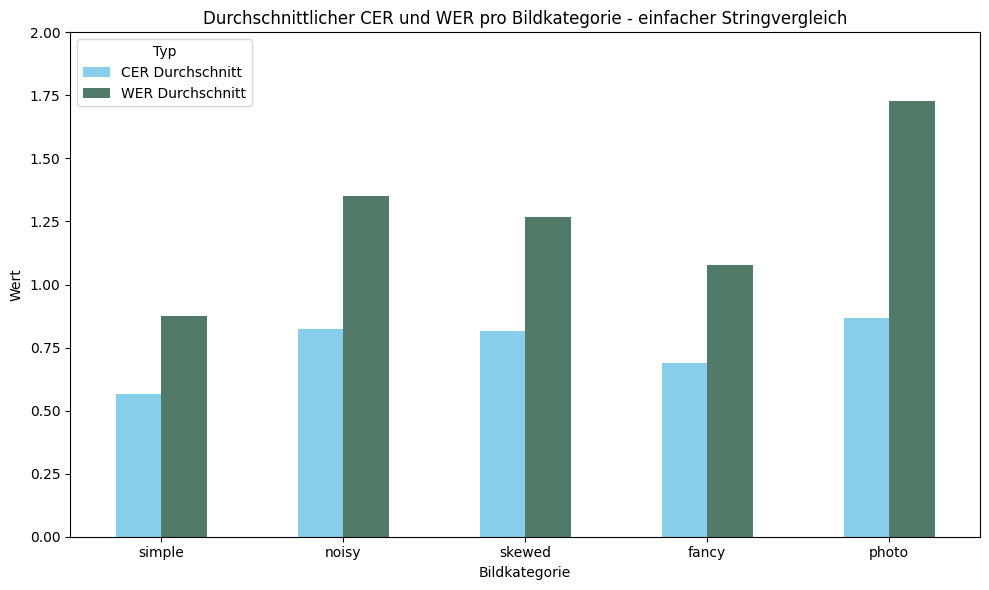

In [77]:
import matplotlib.pyplot as plt
import pandas as pd


categories = ['simple', 'noisy', 'skewed', 'fancy', 'photo']

# Mittelwerte berechnen
WER_by_category = df.groupby("category")["wer"].mean() 
CER_by_category = df.groupby("category")["cer"].mean() 


# Zusammenführen zu einem DataFrame
df_combined = pd.DataFrame({
    "CER Durchschnitt": CER_by_category,
    "WER Durchschnitt": WER_by_category
})

df_combined = df_combined.loc[categories]

farben = ["skyblue", "#527a68"]

# Plot
ax = df_combined.plot(kind="bar", figsize=(10, 6), color=farben)
plt.title("Durchschnittlicher CER und WER pro Bildkategorie - einfacher Stringvergleich")
plt.ylabel("Wert")
plt.xlabel("Bildkategorie")
plt.xticks(rotation=0)
plt.legend(title="Typ")
plt.ylim(0, 2)
plt.tight_layout()
plt.show()



##### ungwöhnlich viele Werte über 1 entstehen, wenn Anzahl der Deltions, Insertions und Substitution um die strings anzugleichen, die Anzahl der Wörter im Ground Truth übersteigt